todd_5530_Assignment1.

Author: Reagan Todd

Date: 2025-09-24

Purpose: To clean and manipulate data using python.

Copyright: for educational purposes only.


In [1]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1


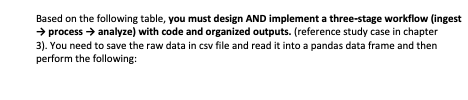

importing pandas and opening the csv data file. Then removed the spacing after each word, changed the data types for the age, weight, height, and grip strength variables:

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/5530/raw_data/5530_Assignment1.csv")
print(df.head())

df.isnull().values.any()

df.columns = df.columns.str.strip()


df[["Height", "Weight", "Grip strength"]] = df[["Height", "Weight", "Grip strength"]].astype(float)
df["Age"]=df["Age"].astype(int)
print(df.dtypes)


  Height  Weight  Age  Grip strength  Frailty 
0   65.8     112   30             30        N 
1   71.5     136   19             31        N 
2   69.4     153   45             29        N 
3   68.2     142   22             28        Y 
4   67.8     144   29             24        Y 
Height           float64
Weight           float64
Age                int64
Grip strength    float64
Frailty           object
dtype: object


creating proper variable names and variables:

In [3]:
df = df.rename(columns={
    'Height': 'height_in',
    'Weight': 'weight_lb',
    'Age': 'age_years',
    'Grip strength': 'grip_strength_kg',
    'Frailty': 'frailty'
})

print(df.head())

   height_in  weight_lb  age_years  grip_strength_kg frailty
0       65.8      112.0         30              30.0      N 
1       71.5      136.0         19              31.0      N 
2       69.4      153.0         45              29.0      N 
3       68.2      142.0         22              28.0      Y 
4       67.8      144.0         29              24.0      Y 


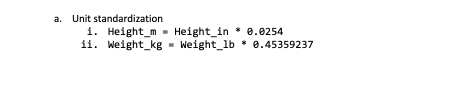

converting the provided height in inches and weight in pounds to height in meters and weight in kilograms:

In [4]:
df['height_m'] = (df['height_in'] * 0.0254).round(2)
df['weight_kg'] = (df['weight_lb'] * 0.45359237).round(2)
df = df.drop(columns=['height_in', 'weight_lb'])
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg
0         30              30.0      N       1.67      50.80
1         19              31.0      N       1.82      61.69
2         45              29.0      N       1.76      69.40
3         22              28.0      Y       1.73      64.41
4         29              24.0      Y       1.72      65.32


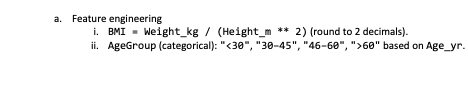

calculating BMI using the weight (kg) and height (m):

In [5]:
df['bmi'] = (df['weight_kg'] / (df['height_m'] ** 2)).round(2)
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg    bmi
0         30              30.0      N       1.67      50.80  18.22
1         19              31.0      N       1.82      61.69  18.62
2         45              29.0      N       1.76      69.40  22.40
3         22              28.0      Y       1.73      64.41  21.52
4         29              24.0      Y       1.72      65.32  22.08


Creating age categories based upon years of age:

In [6]:
bins = [0, 30, 45, 60, float('inf')]
labels = ['<30', '30-45', '45-60', '>60']
df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=False)
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg    bmi age_group
0         30              30.0      N       1.67      50.80  18.22     30-45
1         19              31.0      N       1.82      61.69  18.62       <30
2         45              29.0      N       1.76      69.40  22.40     45-60
3         22              28.0      Y       1.73      64.41  21.52       <30
4         29              24.0      Y       1.72      65.32  22.08       <30


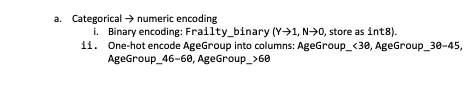

Creating binary encoding for frailty:

In [7]:
import numpy as np
df['frailty_binary'] = np.where(df['frailty'].str.strip() == 'Y', 1, 0).astype(np.int8)
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg    bmi age_group  \
0         30              30.0      N       1.67      50.80  18.22     30-45   
1         19              31.0      N       1.82      61.69  18.62       <30   
2         45              29.0      N       1.76      69.40  22.40     45-60   
3         22              28.0      Y       1.73      64.41  21.52       <30   
4         29              24.0      Y       1.72      65.32  22.08       <30   

   frailty_binary  
0               0  
1               0  
2               0  
3               1  
4               1  


One-hot encode for agegroup columns:

In [8]:
df = pd.get_dummies(df, columns=['age_group'], prefix='age_group')
print(df.head())

   age_years  grip_strength_kg frailty  height_m  weight_kg    bmi  \
0         30              30.0      N       1.67      50.80  18.22   
1         19              31.0      N       1.82      61.69  18.62   
2         45              29.0      N       1.76      69.40  22.40   
3         22              28.0      Y       1.73      64.41  21.52   
4         29              24.0      Y       1.72      65.32  22.08   

   frailty_binary  age_group_<30  age_group_30-45  age_group_45-60  \
0               0          False             True            False   
1               0           True            False            False   
2               0          False            False             True   
3               1           True            False            False   
4               1           True            False            False   

   age_group_>60  
0          False  
1          False  
2          False  
3          False  
4          False  


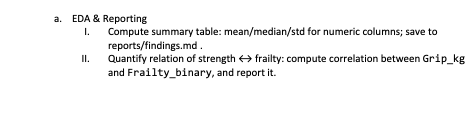

Finding descriptive statistics on all numeric columns:

In [9]:
summary_table = df.describe().loc[['mean', '50%', 'std']]
print(summary_table)

      age_years  grip_strength_kg  height_m  weight_kg        bmi  \
mean  32.500000         26.000000  1.741000  59.829000  19.716000   
50%   29.500000         27.000000  1.735000  61.690000  19.150000   
std   12.860361          4.521553  0.043063   6.457045   1.793911   

      frailty_binary  
mean        0.400000  
50%         0.000000  
std         0.516398  


The average age of participants is 32.5 years (+/-12.9). Average grip strength for these women was 26kg (+/-4.5). The women were of average height of 1.7m and a healthy average weight of 59.8kg. The average bmi of 19.7 reveals a normal, or healthy weight. The frailty average illustrates that 40% of the women had the presence of frailty symptoms.

Saving the summary table as an .md into my results folder:

In [10]:
output_path = "/content/drive/MyDrive/5530/results/A1_P1_summary.md"
with open(output_path, "w") as f:
    f.write(summary_table.to_markdown())

print(f"Summary saved as Markdown at: {output_path}")

Summary saved as Markdown at: /content/drive/MyDrive/5530/results/A1_P1_summary.md


Calculating correlations:

In [11]:
corr = df['grip_strength_kg'].corr(df['frailty_binary'])
print(f"Pearson correlation: {corr:.3f}")

Pearson correlation: -0.476


With a pearson correlation value of -0.476, there is a weak negative correlation between frailty and grip strength. This could suggest that women having a higher grip strength means less frailty.

Saving manipulated dataset into the clean_data file:

In [12]:
cleaned_file_drive = "/content/drive/MyDrive/5530/clean_data/5530_Assignment1_clean.csv"
df.to_csv(cleaned_file_drive, index=False)
print(f"Saved cleaned dataset to Google Drive at {cleaned_file_drive}")

Saved cleaned dataset to Google Drive at /content/drive/MyDrive/5530/clean_data/5530_Assignment1_clean.csv


# Part 2

Data cleaning and organizing steps:

In [13]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/5530/raw_data/StudentsPerformance.csv")
print(df.head())

df.isnull().values.any()

print(df.dtypes)

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test pr

Calculating overall_avg:

In [14]:
df["overall_avg"] = df.mean(axis=1, numeric_only=True).round(2)
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   overall_avg  
0        72.67  
1        82.33  
2        92.67  
3        49.33  
4        76.33  


Getting frequencies and descriptive statistics for this dataset:

In [15]:
for col in df.select_dtypes(include="object").columns:
    print(f"\nFrequencies for {col}:")
    print(df[col].value_counts())

desc = df.describe().round(2)
print("\nDescriptive stats (numeric variables):\n", desc)


Frequencies for gender:
gender
female    518
male      482
Name: count, dtype: int64

Frequencies for race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Frequencies for parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Frequencies for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Frequencies for test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64

Descriptive stats (numeric variables):
        math score  reading score  writing score  overall_avg
count     1000.00        1000.00        1000.00      1000.00
mean        66.09          69.17          68.05        67.77
std         15.16          14.60          15.20        14.26
mi

Saving clean dataset to clean_data folder:

In [16]:
df.to_csv("/content/drive/MyDrive/5530/clean_data/StudentsPerformance_clean.csv", index=False)

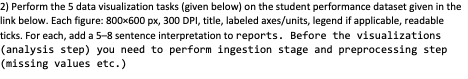

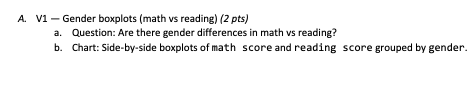

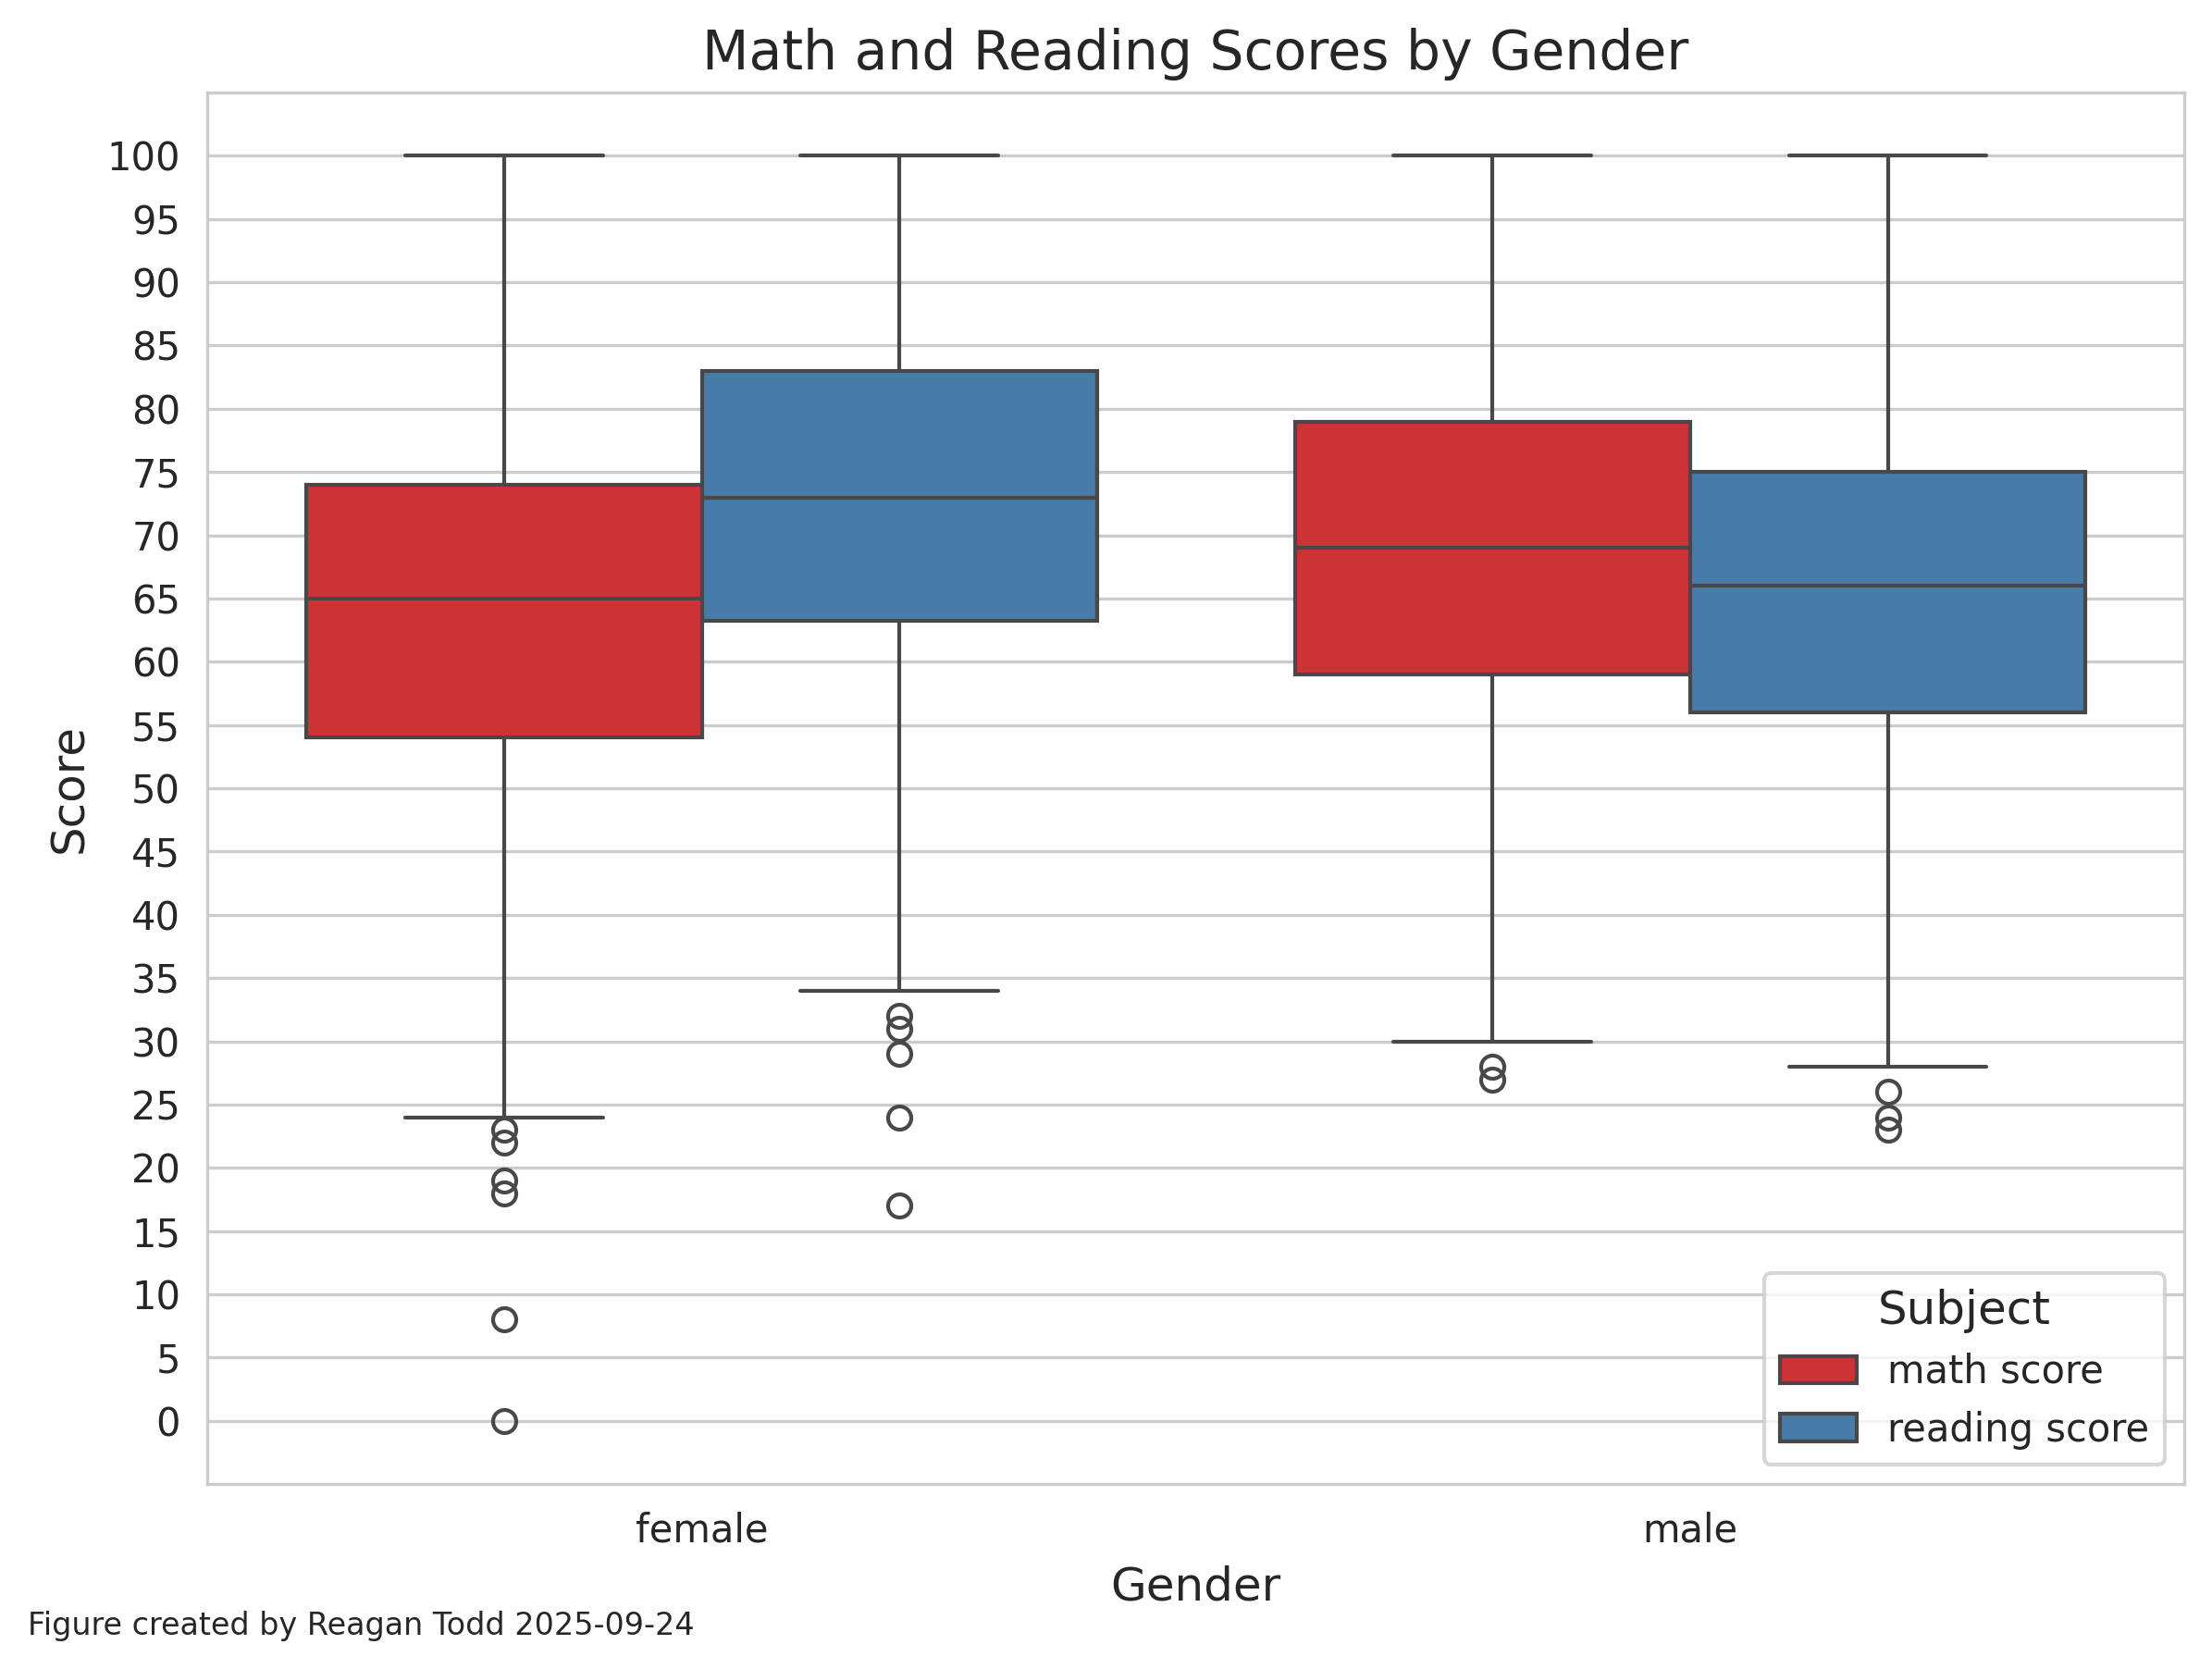

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_melt = df.melt(id_vars='gender', value_vars=['math score', 'reading score'],
                  var_name='Subject', value_name='Score')

plt.figure(figsize=(8, 6), dpi=300)
sns.set_style("whitegrid")

sns.boxplot(data=df_melt, x='gender', y='Score', hue='Subject', palette="Set1")

plt.title("Math and Reading Scores by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Score", fontsize=12)

plt.legend(title="Subject", fontsize=10, title_fontsize=12)

plt.yticks(np.arange(0, df_melt['Score'].max() + 5, 5))

plt.figtext(0.01, 0.01, "Figure created by Reagan Todd 2025-09-24", fontsize=8, ha="left")

plt.tight_layout()
plt.show()

There are visible gender differences amongst the test scores for both math and reading.

For math score, females have an average score of 65 whereas males have an average score of 69. Both contain several outliers, with females having an outlier math score of 0. Both genders have a maximum math score of 100, but differ in about 5 points for their lower quartile.

For reading score, females have a higher average score of 73, compared to males at an average score of 66. Males have a smaller spread of outliers compared to females, but have a much lower 25% quartile with a score of 28. Both genders have a maximum score of 100, but females contain the minimum score of 17.

Overall, it seems that males performed better on the math section, but females performed better on the reading section.

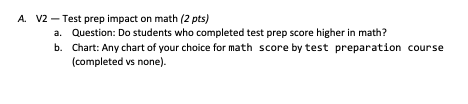

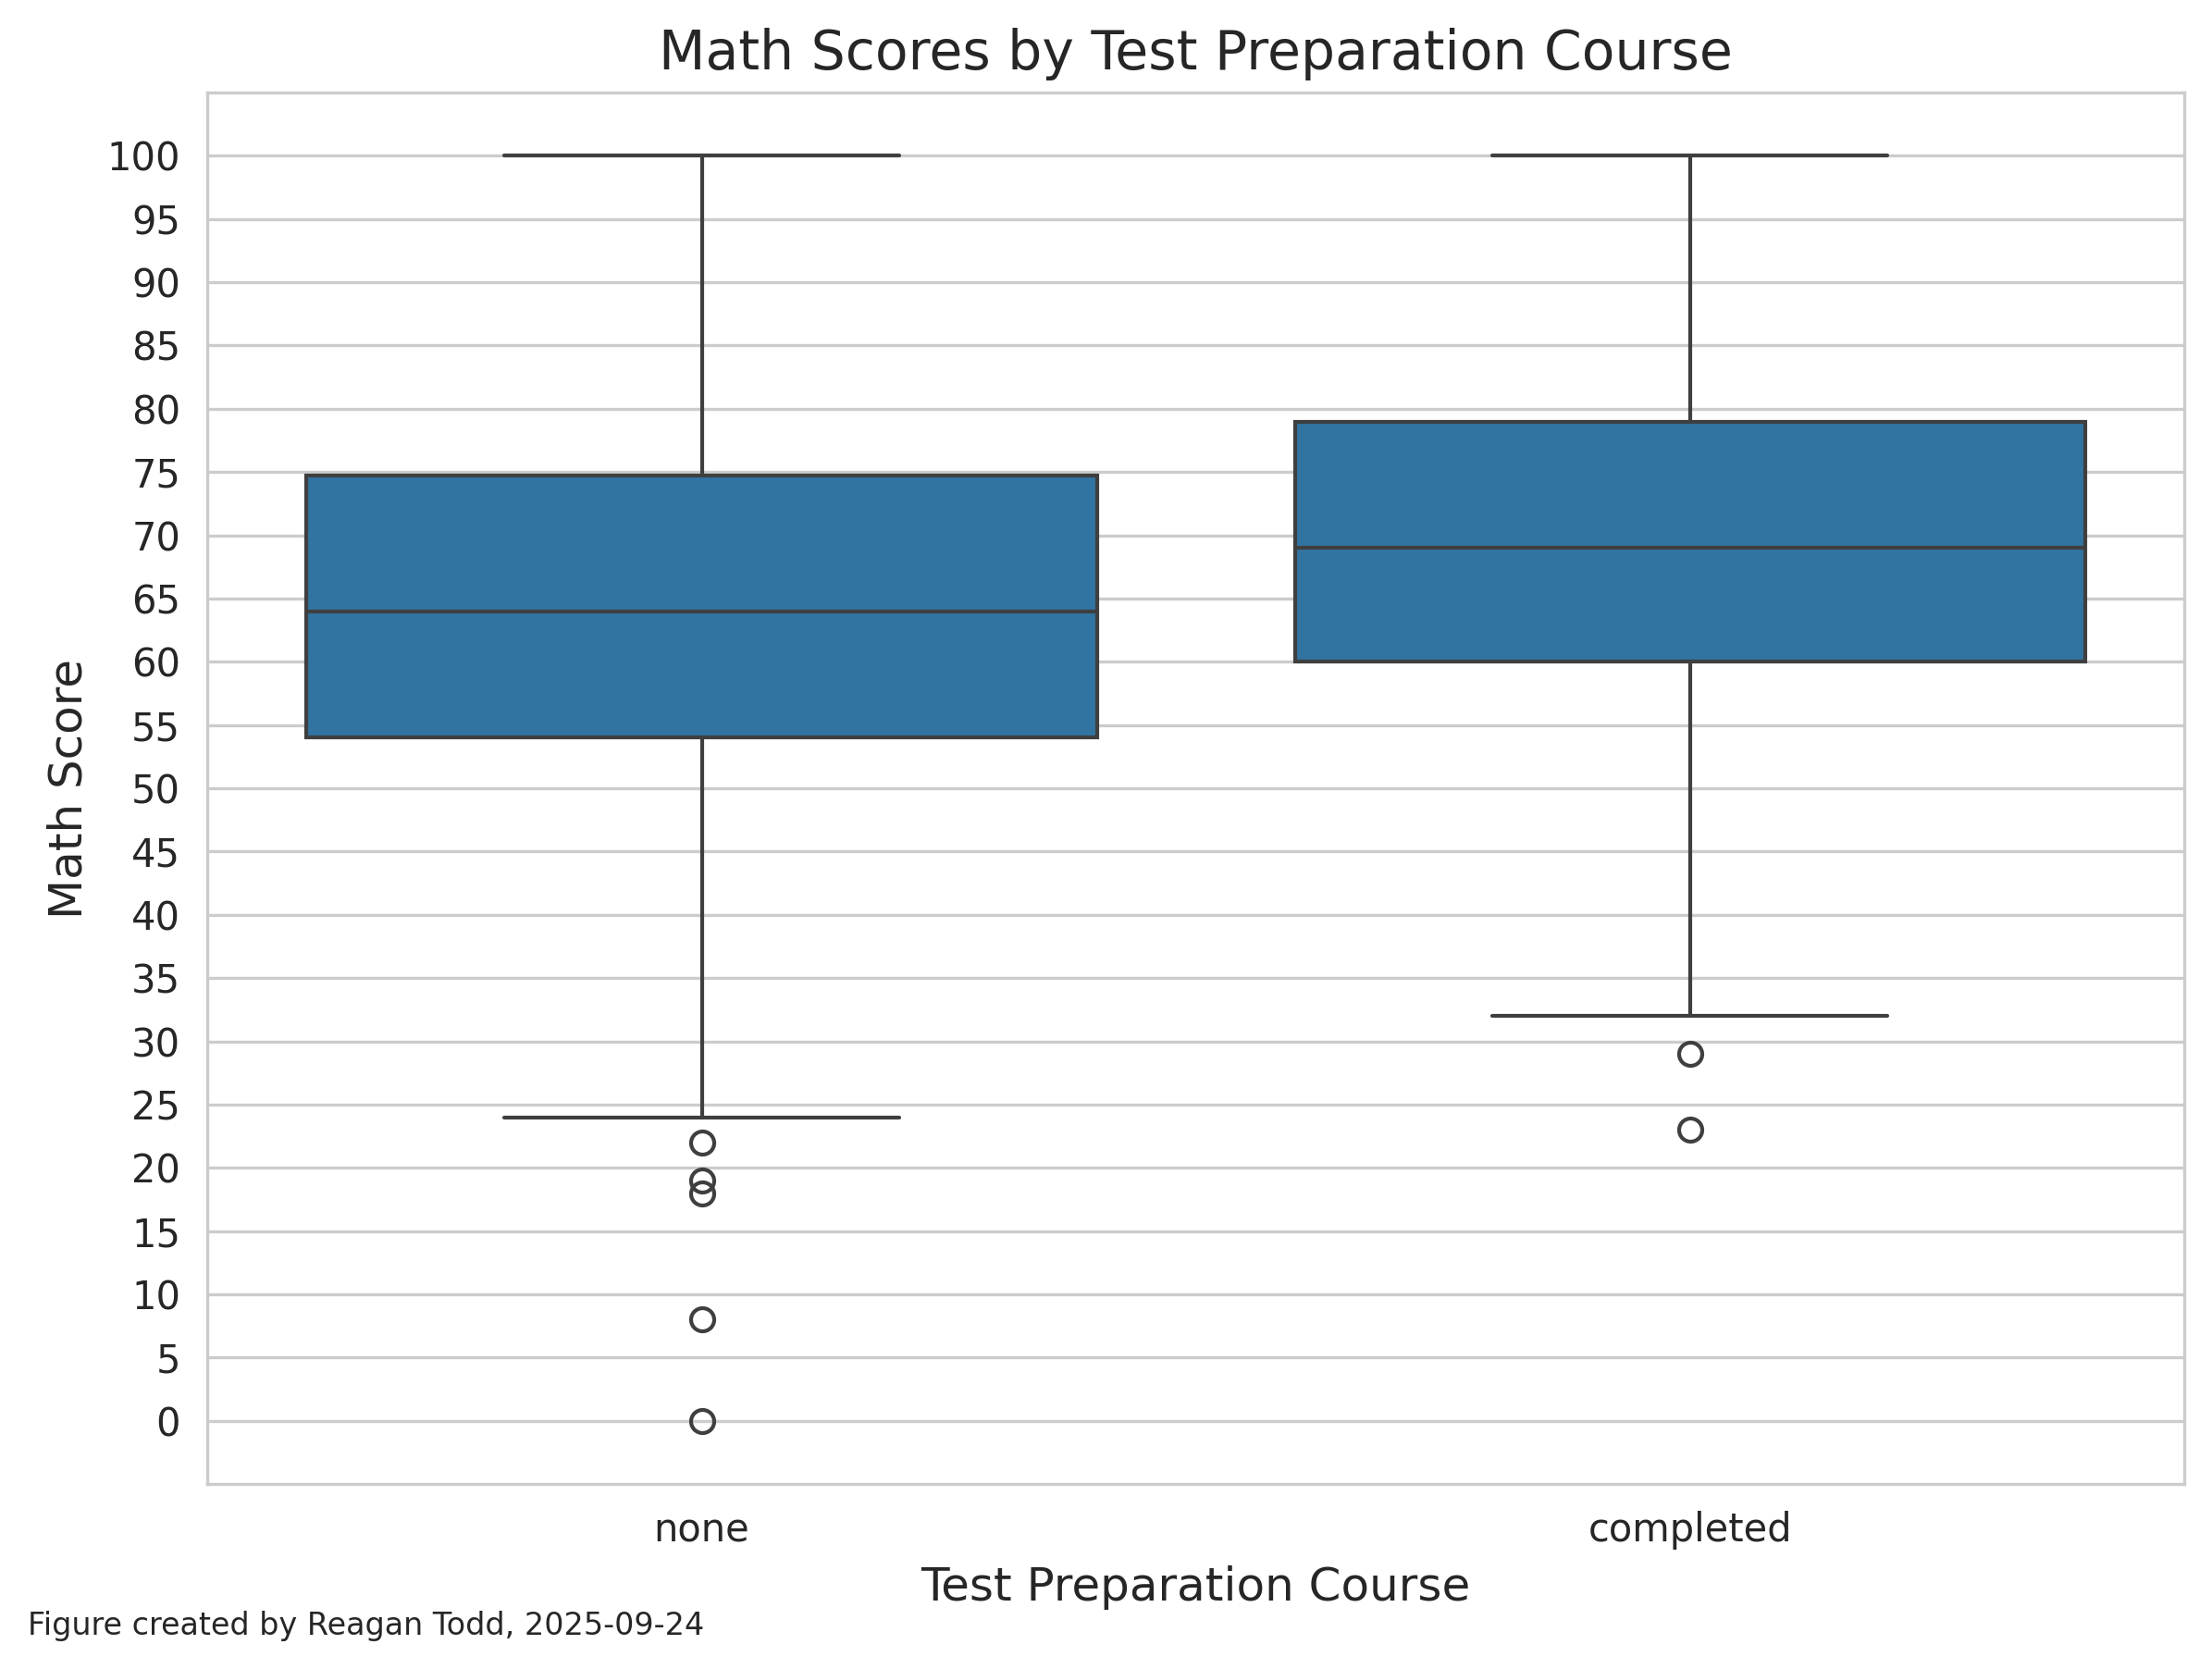

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6), dpi=300)
sns.set_style("whitegrid")

sns.boxplot(data=df, x='test preparation course', y='math score')

plt.title("Math Scores by Test Preparation Course", fontsize=14)
plt.xlabel("Test Preparation Course", fontsize=12)
plt.ylabel("Math Score", fontsize=12)

plt.yticks(np.arange(0, df['math score'].max() + 5, 5))

plt.figtext(0.01, 0.01, "Figure created by Reagan Todd, 2025-09-24", fontsize=8, ha="left")

plt.tight_layout()
plt.show()

There does appear to be differences in math test scores between those who completed the test preparation course compared to those who did not.

Those who completed the test preparation course averaged a score of 68, which was about 4 points higher than those who did not recieve any test preparation. Both groups had a maximum of 100, but those who did not complete the test preparation course had a lower 25% quartile with a score of 24. Participants from the no test preparation course had lower outliers (0, 8, 17-23) compared to those who did complete the prep course (minimum=23). There seems to be more varaibility in math scores for those who did not complete the test course compared to those who did.

This graph would suggest that completing the test preparation course would have a little benefit to scoring high on the math section.

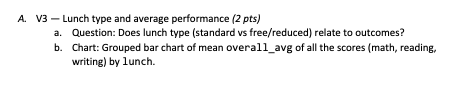

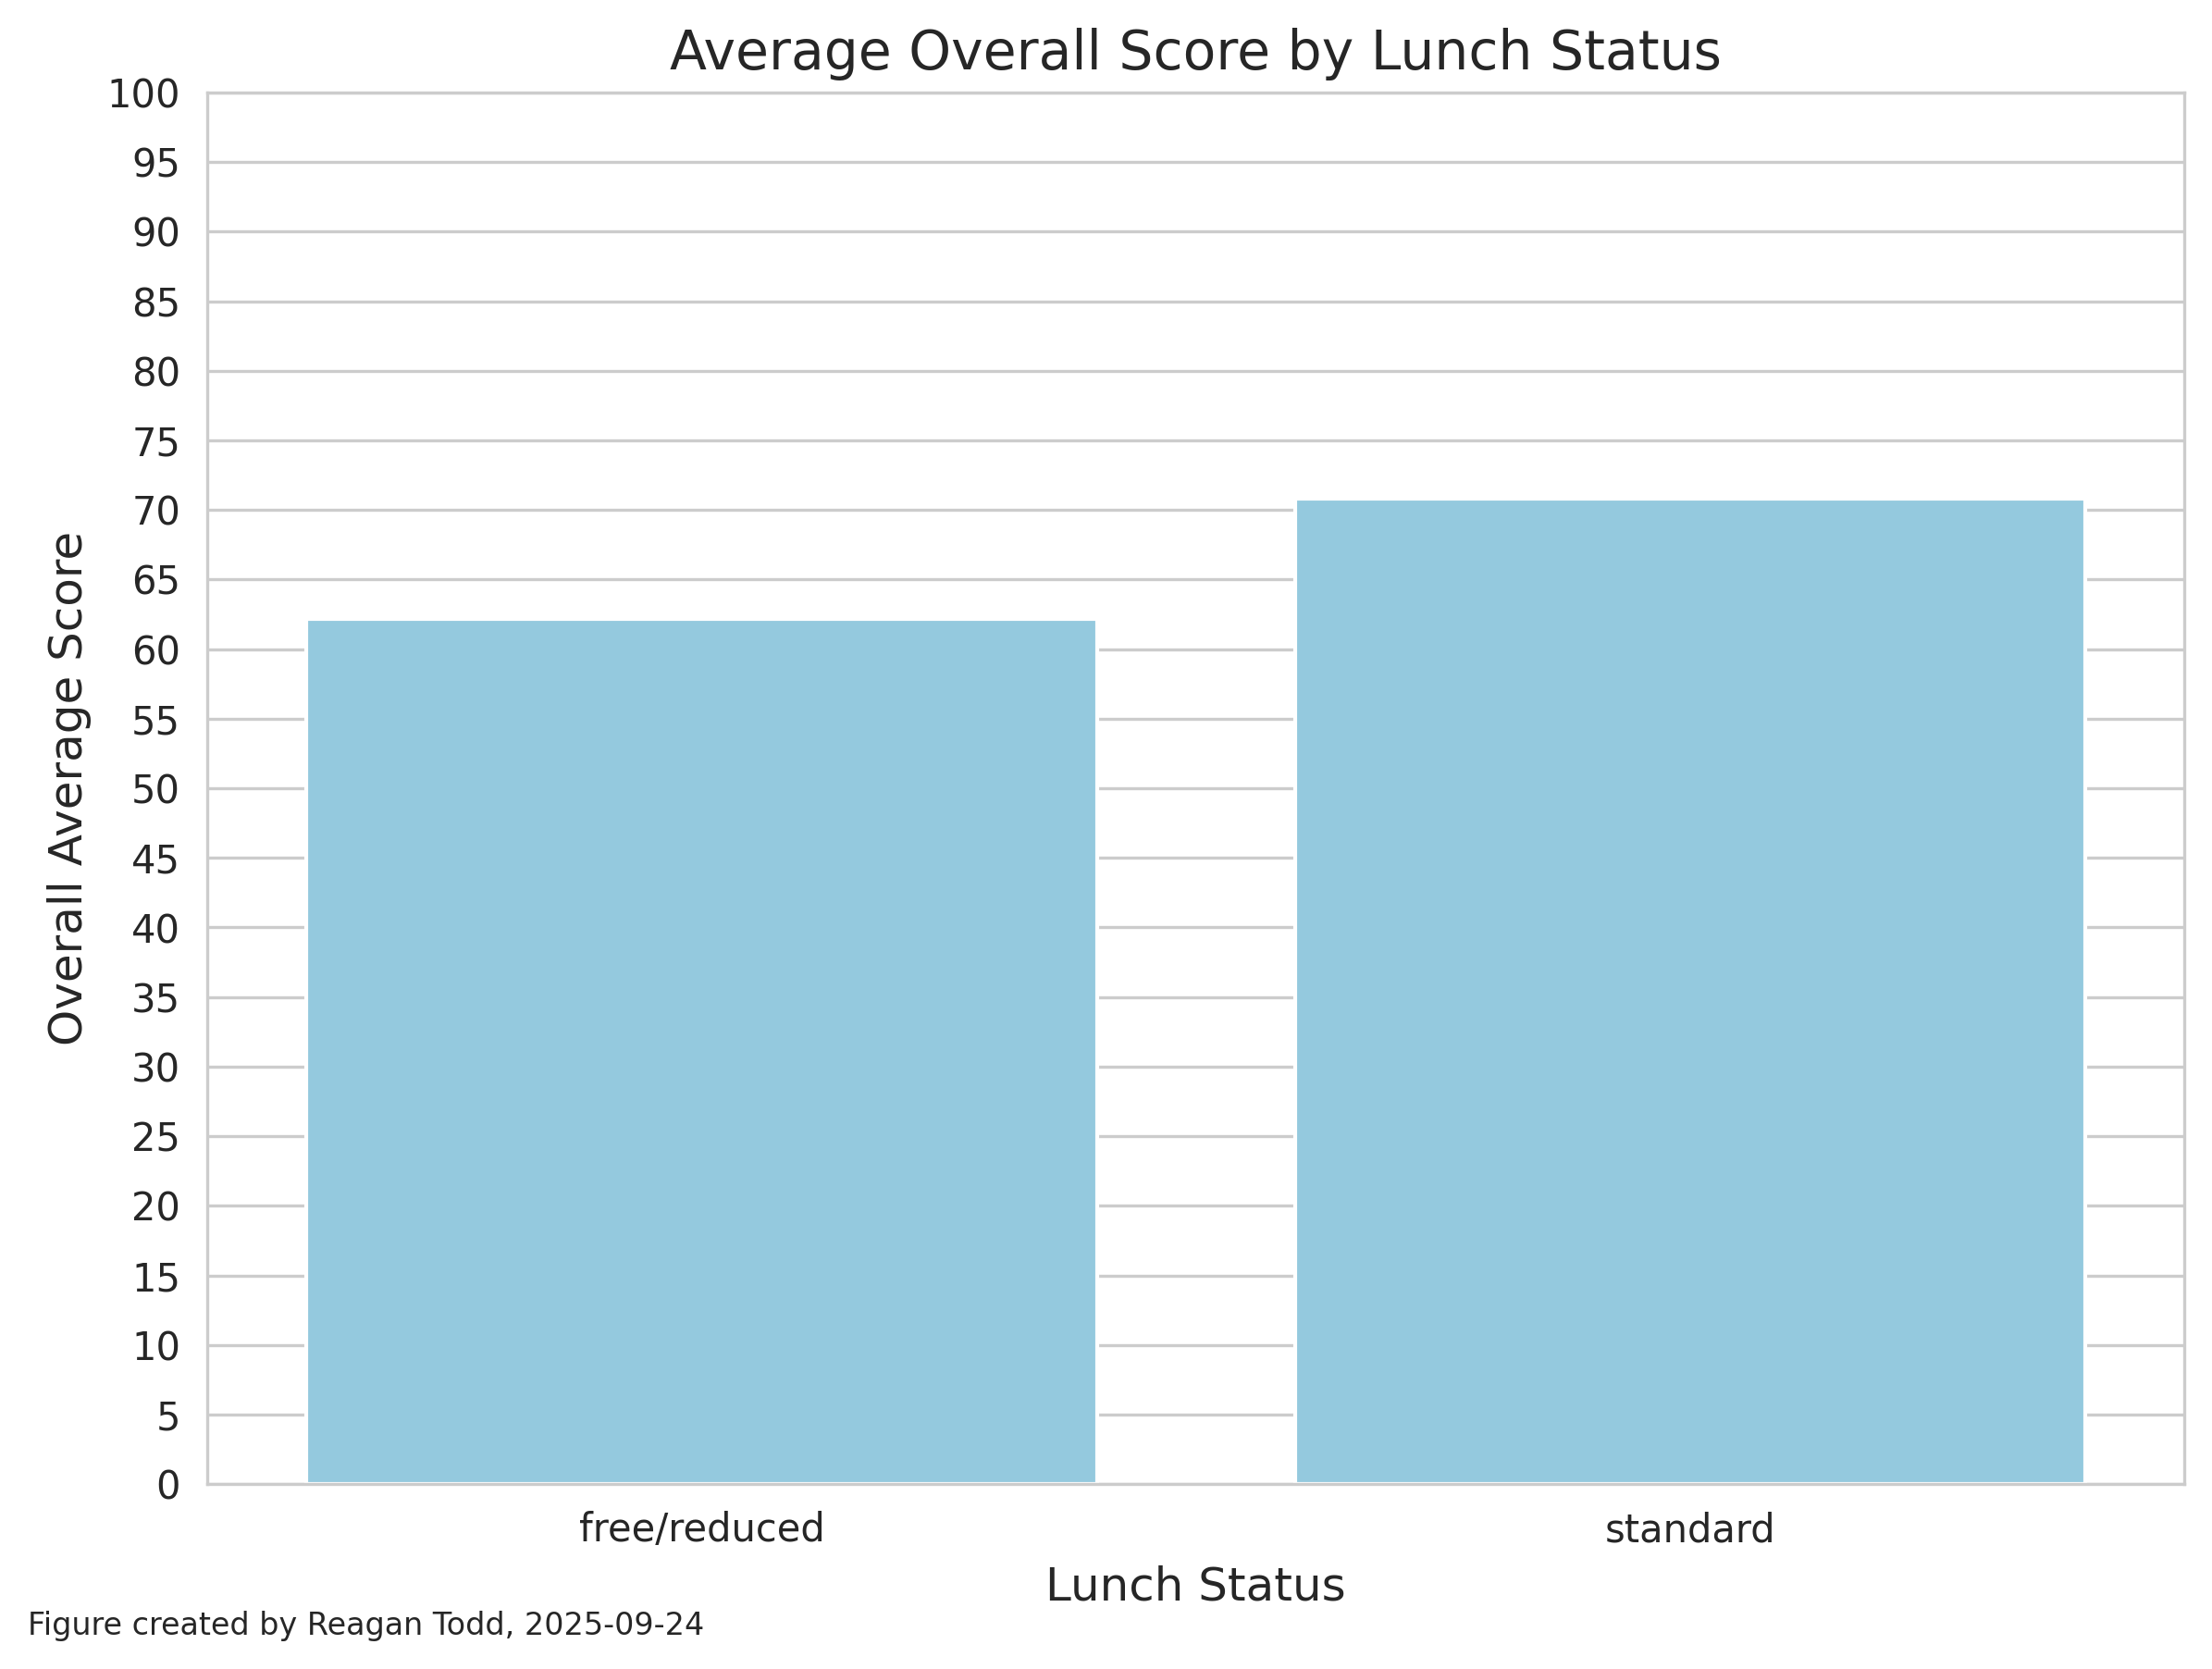

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lunch_avg = df.groupby('lunch')['overall_avg'].mean().reset_index()

plt.figure(figsize=(8, 6), dpi=300)
sns.set_style("whitegrid")

sns.barplot(data=lunch_avg, x='lunch', y='overall_avg', color='skyblue')

plt.title("Average Overall Score by Lunch Status", fontsize=14)
plt.xlabel("Lunch Status", fontsize=12)
plt.ylabel("Overall Average Score", fontsize=12)

plt.yticks(np.arange(0, df['overall_avg'].max() + 5, 5))

plt.figtext(0.01, 0.01, "Figure created by Reagan Todd, 2025-09-24", fontsize=8, ha="left")

plt.tight_layout()
plt.show()

There is almost a 10 point difference between those who receive a free/reduced lunch (average score of 63) compared to those who receive standard lunch (average score of 71).

Based upon this barchart, it would suggest that lunch status (free/reduced vs standard) does have an impact on the overall test score average for the participants.

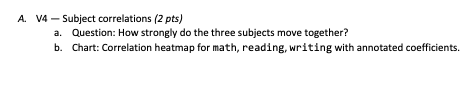

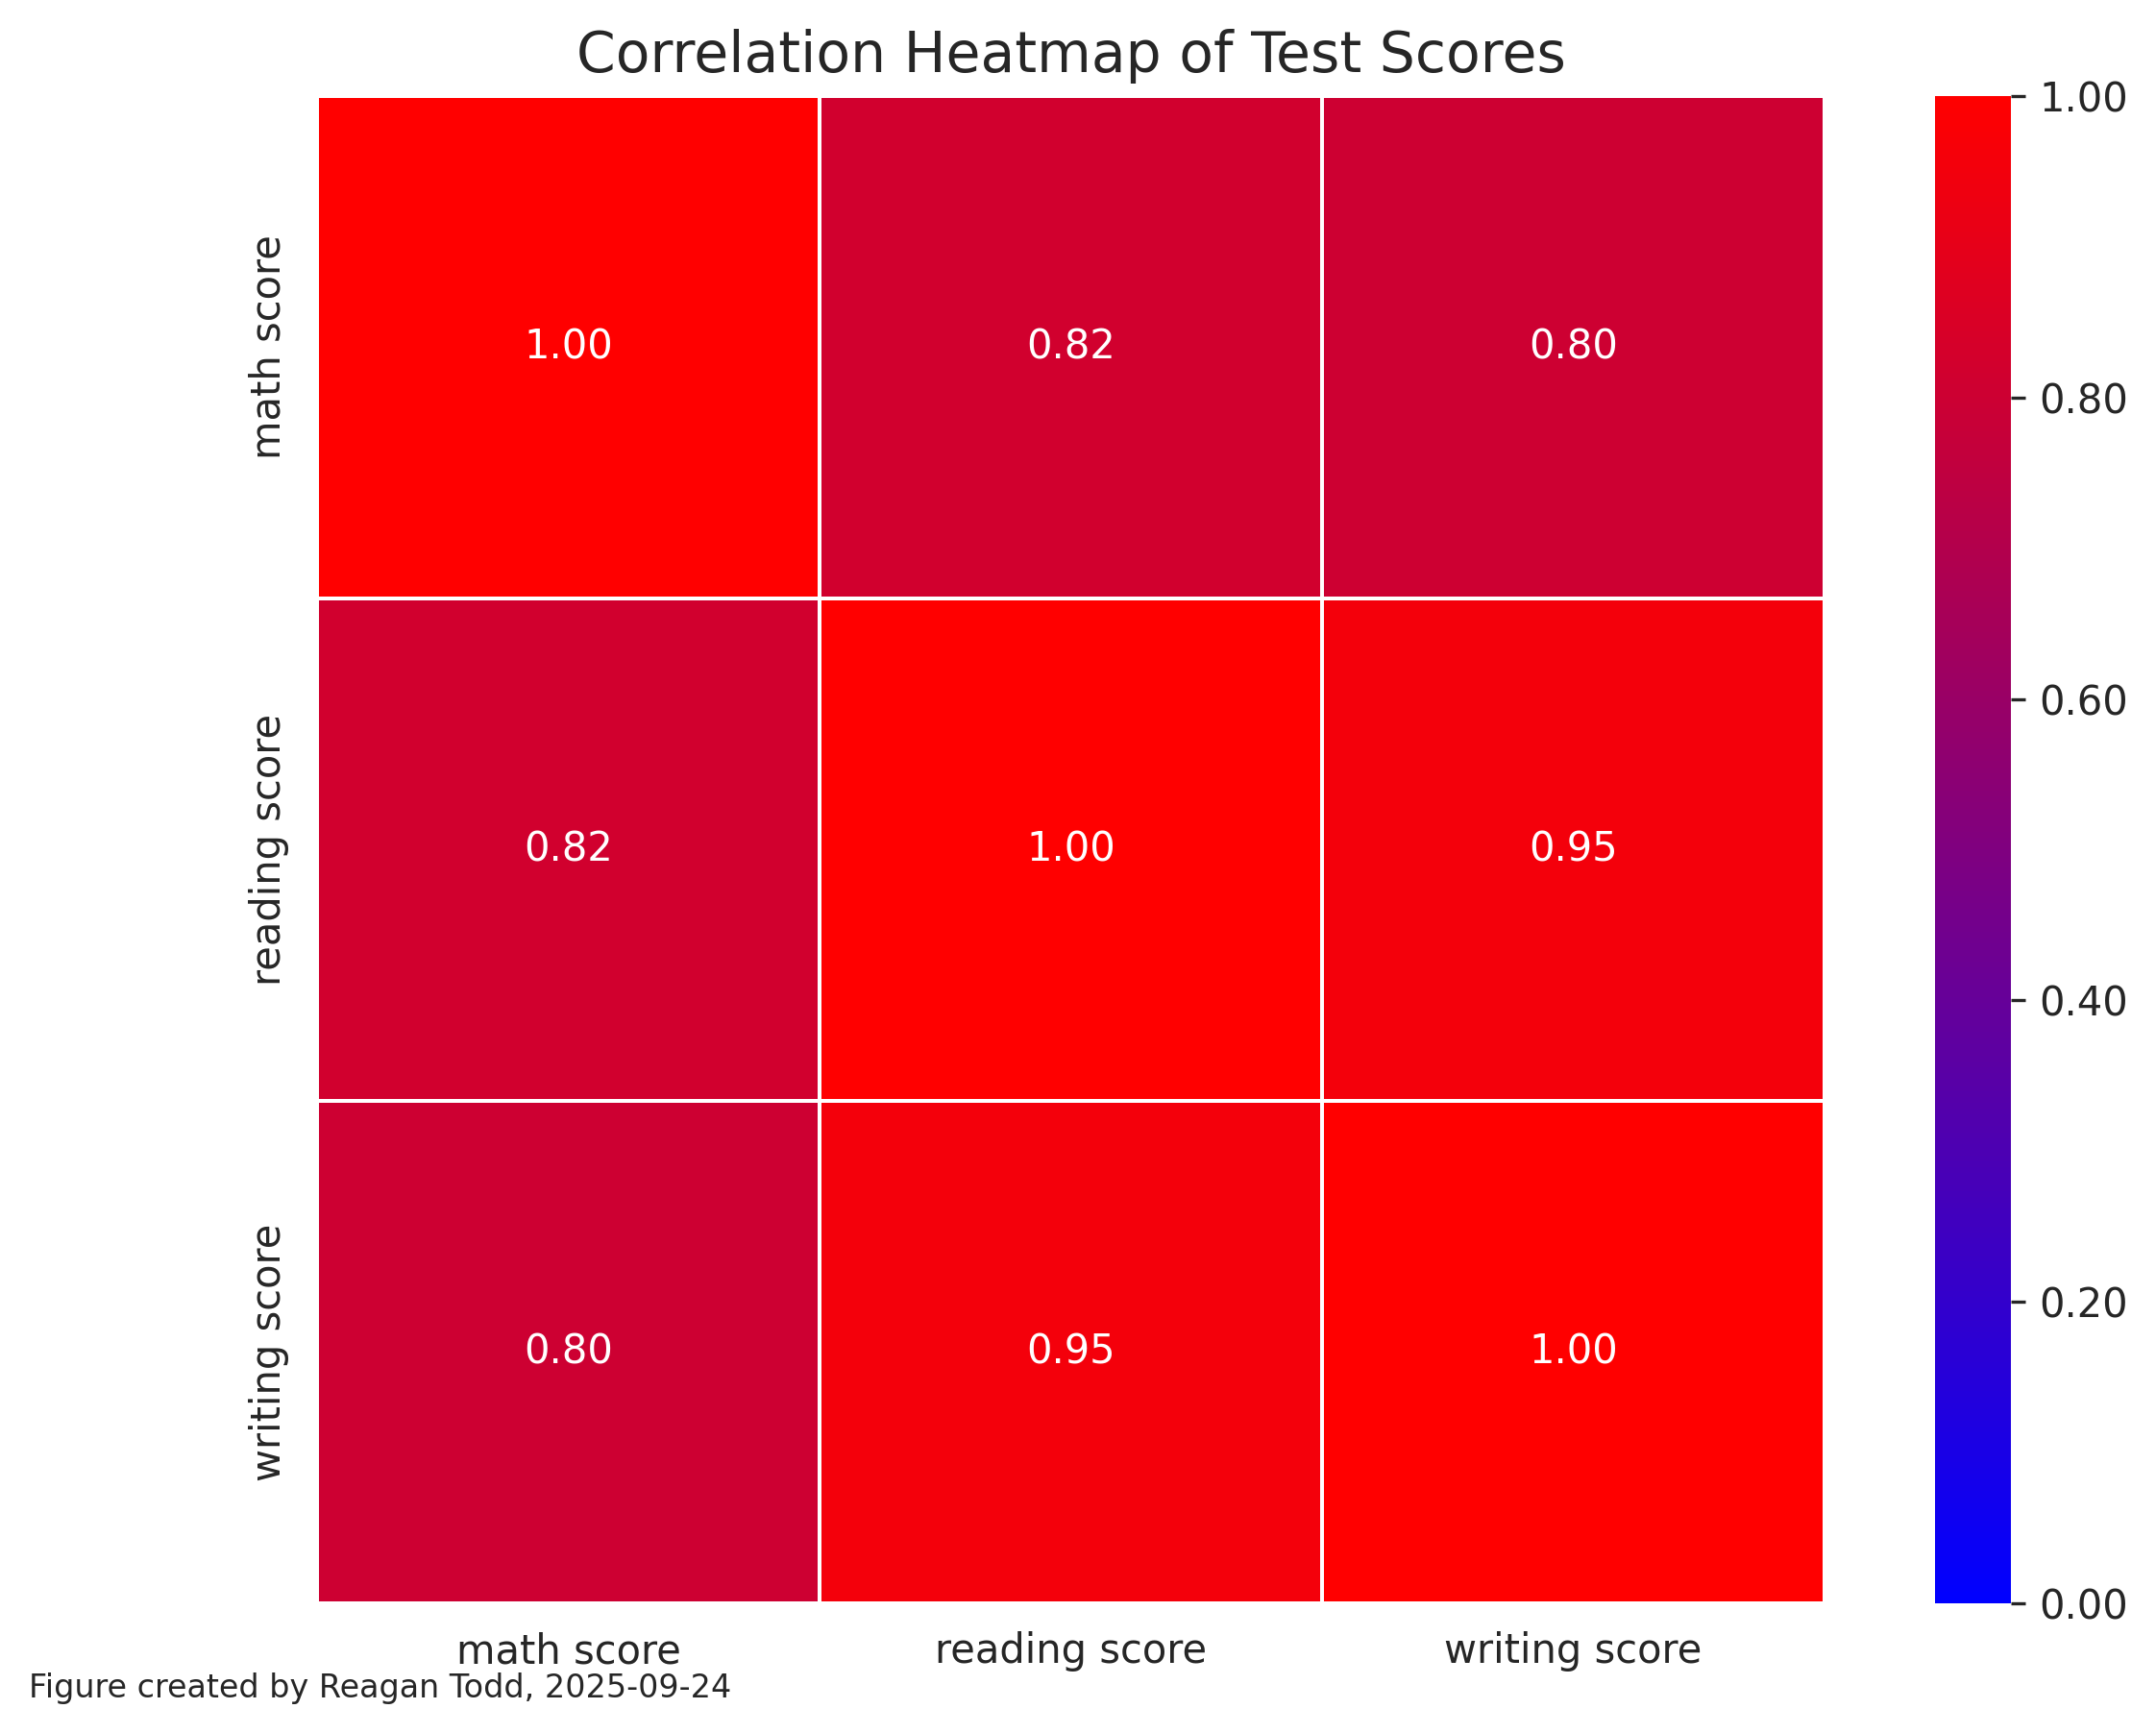

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import seaborn as sns

score_cols = ['math score', 'reading score', 'writing score']
scores_df = df[score_cols]

corr_matrix = scores_df.corr()

plt.figure(figsize=(8, 6), dpi=300)
sns.set_style("white")

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=mcolors.LinearSegmentedColormap.from_list("", ["blue", "red"]),
    cbar=True,
    square=True,
    linewidths=0.5,
    vmin=0,
    vmax=1
)

plt.title("Correlation Heatmap of Test Scores", fontsize=14)

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

plt.figtext(0.01, 0.01, "Figure created by Reagan Todd, 2025-09-24", fontsize=8, ha="left")
plt.subplots_adjust(bottom=0.18)

plt.tight_layout()
plt.show()

This correlation heatmap shows how each test score is impacted by the other.

A correlation coefficient of 0.80 for writing and math scores would suggest that students who perform well on the writing section, tend to perform well on the math section. This is a moderately strong positive correlation between writing and math.

A correlation coefficient of 0.82 would suggest roughly the same thing for reading and math scores. While there is a moderately strong positive correlation between reading and math scores, it is not a perfect relationship (1.0).

A correlation coefficient of 0.95 for reading and writing scores would suggest a very strong positive correlation. This means, that if a participant scores well on the reading section, they will score well in the writing section.

Correlation coefficients of 0.80, 0.82 and 0.95 would all suggest a strong positive relationship, thus proving that the subjects scores are closely related.

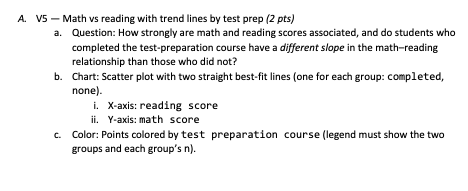

Scatterplot:

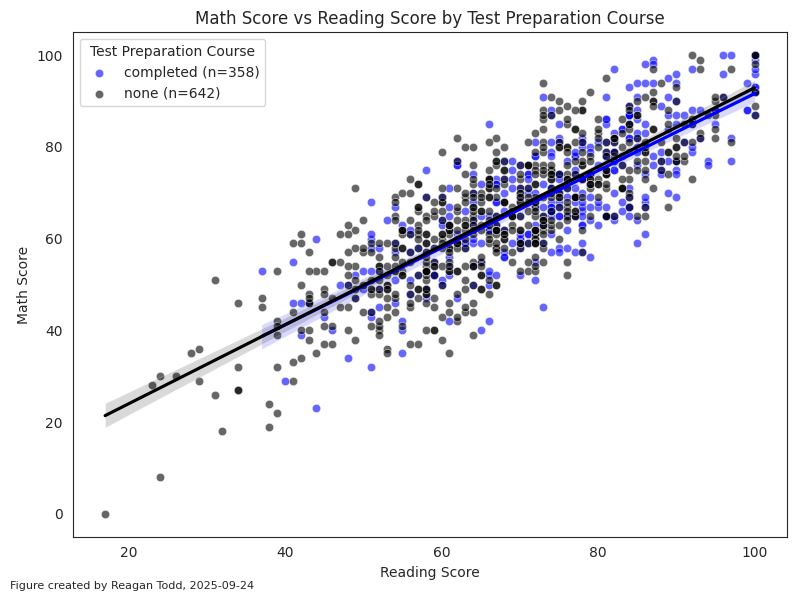

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color_map = {
    'completed': 'blue',
    'none': 'black'
}

plt.figure(figsize=(8, 6))

for label, color in color_map.items():
    subset = df[df['test preparation course'] == label]
    sns.scatterplot(
        data=subset,
        x='reading score',
        y='math score',
        color=color,
        label=f'{label} (n={len(subset)})',
        alpha=0.6
    )
    sns.regplot(
        data=subset,
        x='reading score',
        y='math score',
        scatter=False,
        color=color
    )

plt.title('Math Score vs Reading Score by Test Preparation Course')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.legend(title='Test Preparation Course')
plt.figtext(0.01, 0.01, "Figure created by Reagan Todd, 2025-09-24", fontsize=8, ha="left")
plt.tight_layout()
plt.show()

Slope:

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression

groups = df['test preparation course'].unique()

for group in groups:
    subset = df[df['test preparation course'] == group]

    X = subset[['reading score']]
    y = subset['math score']

    model = LinearRegression().fit(X, y)

    slope = model.coef_[0]
    intercept = model.intercept_

    print(f"{group.title()} group:")
    print(f"Math Score = {slope:.2f} * Reading Score + {intercept:.2f}")
    print()

None group:
Math Score = 0.86 * Reading Score + 6.77

Completed group:
Math Score = 0.84 * Reading Score + 7.60



As seen in the previous correlation heat map, math and reading scores are closely related. As the reading scores increase, so do the math test scores, thus continuously proving their positive relationship.

From the scatterplot, it would appear that those in the category for not completing the test preparation course have a higher slope (0.86 x reading score) compared to those who did take the preparation course (0.84 x reading score). This would suggest that those who didn't complete the prep course, their math score would increase with each increase in their reading score.

With the intercepts of 6.77 (no prep) and 7.60 (prep completed), those who did complete the prep tend to have a higher overall math performance.

This would suggest that the test preparation course offers a better starting point for students to be successfull on the testing.